# **Importacion de Librerias**

In [ ]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# **Lectura De Datos**

In [ ]:
database = 'drive/MyDrive/NBA Data/basketball.sqlite'
con = sqlite3.connect(database)

# **Analisis de Datos**

1) ¿Cuantos jugadores han jugado en la nba? 4501 jugadores

In [ ]:
consulta = '''SELECT COUNT(p.id) Total
              FROM Player p'''
data = pd.read_sql_query(consulta, con)
data

,Total
0,4501


2) ¿Cuál es la duracion promedio de la carrera de un jugador de la NBA? 4.3 años

In [ ]:
consulta = '''SELECT ROUND(AVG(SEASON_EXP),1) Duracion_Promedio
              FROM Player_Attributes pa'''
data = pd.read_sql_query(consulta, con)
data

,Duracion_Promedio
0,4.3


3) ¿Cuál es la duración promedio de la carrera de un jugador activo de la NBA? 4.9 años

In [ ]:
consulta = '''SELECT ROUND(AVG(season_exp),1) Duracion_Promedio
              FROM Player_Attributes pa INNER JOIN Player p ON p.id = pa.ID
              WHERE is_active = 1'''
data = pd.read_sql_query(consulta, con)
data

,Duracion_Promedio
0,4.9


4) ¿Cuál es la proporción de posiciones?

In [ ]:
consulta = '''SELECT position Posicion, ROUND(CAST(COUNT(position) AS float) / CAST(4501 AS float) * 100, 2) AS Porcentaje_Jugadores
              FROM Player_Attributes
              GROUP BY position;'''
data = pd.read_sql_query(consulta, con)
data


,Posicion,Porcentaje_Jugadores
0,,1.33
1,Center,14.04
2,Center-Forward,1.93
3,Forward,36.37
4,Forward-Center,2.98
5,Forward-Guard,1.62
6,Guard,38.08
7,Guard-Forward,3.62


5) ¿Quién es el jugador más alto? Gheorghe Muresan	91 puladas



In [ ]:
consulta = '''
        SELECT display_first_last Nombre, REPLACE(MAX(height), '-', ',') Altura
        FROM Player_Attributes
        '''
data = pd.read_sql_query(consulta, con)
data

,Nombre,Altura
0,Gheorghe Muresan,91.0


6) ¿Quién es el jugador más bajo?Michael Adams 91	pulgadas

In [ ]:
consulta = '''
        SELECT display_first_last AS Nombre, REPLACE(MIN(height), '-',',') Altura
        FROM Player_Attributes
        WHERE height <> ''
        '''
data = pd.read_sql_query(consulta, con)
data

,Nombre,Altura
0,Earl Boykins,65.0


7) ¿Cómo es la distribución de altura?

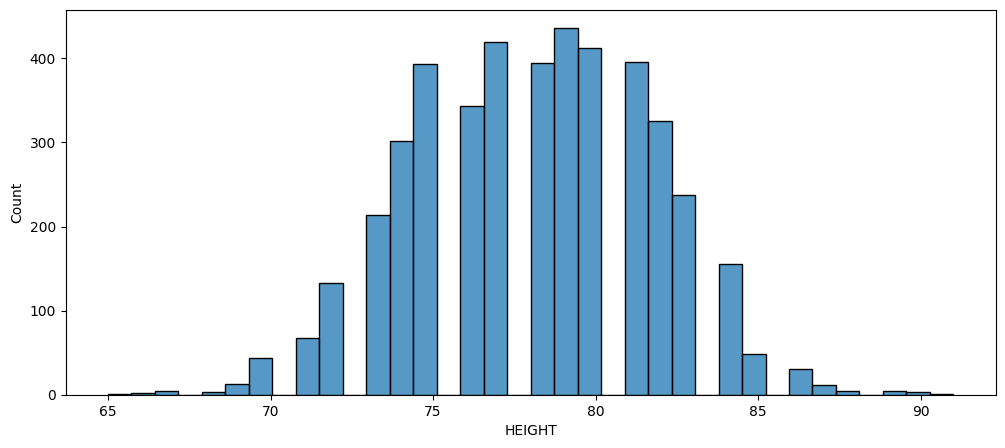

In [ ]:
consulta = '''
        SELECT pa.*, p.is_active
        FROM Player_Attributes pa INNER JOIN Player p ON p.id = pa.ID
        ORDER BY HEIGHT desc
        '''
data = pd.read_sql_query(consulta, con)

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x="HEIGHT")
plt.show()

8) ¿Se correlaciona la altura con el peso? si se correlaciona

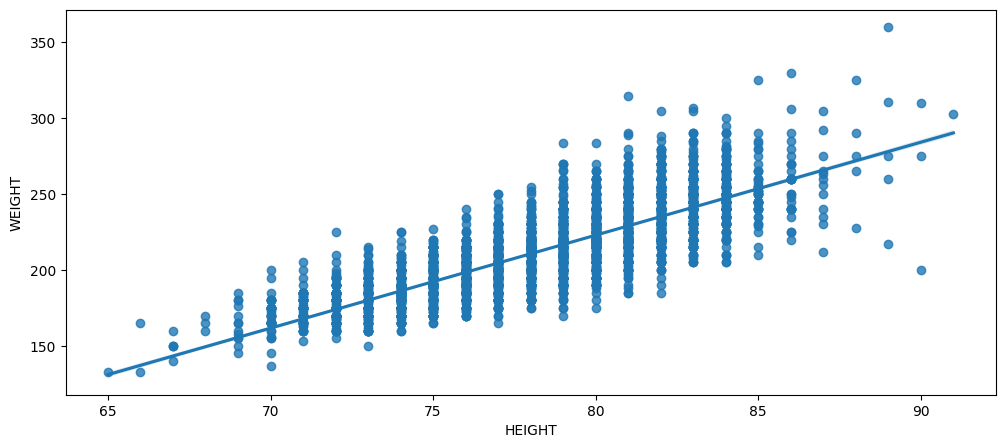

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(data=data, x="HEIGHT", y="WEIGHT")
plt.show()

9) ¿Se correlaciona la altura con los rebotes? si se correlaciona

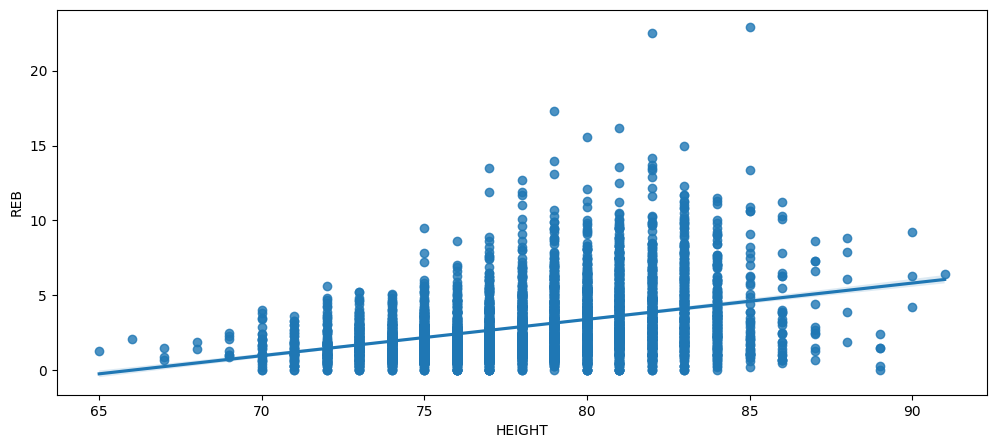

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(data=data, x="HEIGHT", y="REB")
plt.show()

10) ¿La altura se correlaciona con los puntos? no se correlacionan

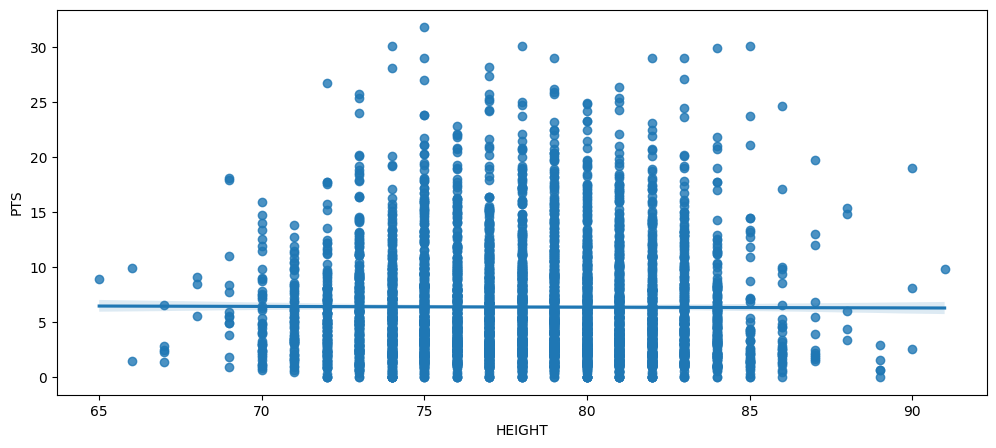

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(data=data, x="HEIGHT", y="PTS")
plt.show()

11) ¿La altura se correlaciona con las asistencias? tiene una correlacion inversa

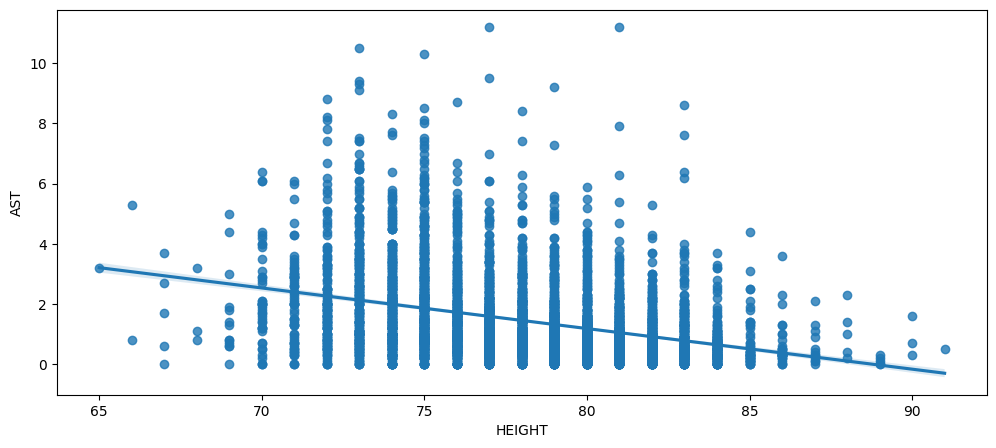

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(data=data, x="HEIGHT", y="AST")
plt.show()

12) ¿Qué jugadores activos han promediado más de 20 puntos por partido? 46 jugadores promediaron mas de 20 puntos

In [ ]:
consulta = '''
        SELECT pa.*, p.is_active
        FROM Player_Attributes pa INNER JOIN Player p ON p.id = pa.ID
        WHERE p.IS_ACTIVE=1 AND PTS > 20
        ORDER BY HEIGHT desc
        '''
data = pd.read_sql_query(consulta, con)
data

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE,is_active
0,203954,Joel,Embiid,Joel Embiid,"Embiid, Joel",J. Embiid,joel-embiid,1994-03-16T00:00:00,Kansas,Cameroon,...,Y,2014,1,3,29.9,3.3,11.5,None,0.211,1
1,203507,Giannis,Antetokounmpo,Giannis Antetokounmpo,"Antetokounmpo, Giannis",G. Antetokounmpo,giannis-antetokounmpo,1994-12-06T00:00:00,Filathlitikos,Greece,...,Y,2013,1,15,29.0,6.4,11.7,None,0.196,1
2,203999,Nikola,Jokic,Nikola Jokic,"Jokic, Nikola",N. Jokic,nikola-jokic,1995-02-19T00:00:00,Mega Basket,Serbia,...,Y,2014,2,41,27.1,8.6,11.3,None,0.205,1
3,1627734,Domantas,Sabonis,Domantas Sabonis,"Sabonis, Domantas",D. Sabonis,domantas-sabonis,1996-05-03T00:00:00,Gonzaga,Lithuania,...,Y,2016,1,11,20.2,6.2,11.2,None,0.144,1
4,1626157,Karl-Anthony,Towns,Karl-Anthony Towns,"Towns, Karl-Anthony",K. Towns,karl-anthony-towns,1995-11-15T00:00:00,Kentucky,USA,...,Y,2015,1,1,23.6,4.0,10.2,None,0.153,1
5,202696,Nikola,Vucevic,Nikola Vucevic,"Vucevic, Nikola",N. Vucevic,nikola-vucevic,1990-10-24T00:00:00,Southern California,Montenegro,...,Y,2011,1,16,24.5,3.8,11.7,None,0.172,1
6,203076,Anthony,Davis,Anthony Davis,"Davis, Anthony",A. Davis,anthony-davis,1993-03-11T00:00:00,Kentucky,USA,...,Y,2012,1,1,22.5,3.0,8.4,None,0.163,1
7,201142,Kevin,Durant,Kevin Durant,"Durant, Kevin",K. Durant,kevin-durant,1988-09-29T00:00:00,Texas,USA,...,Y,2007,1,2,29.0,5.3,7.3,None,0.163,1
8,1626174,Christian,Wood,Christian Wood,"Wood, Christian",C. Wood,christian-wood,1995-09-27T00:00:00,UNLV,USA,...,Y,Undrafted,Undrafted,Undrafted,21.9,1.4,9.8,None,0.169,1
9,2544,LeBron,James,LeBron James,"James, LeBron",L. James,lebron-james,1984-12-30T00:00:00,St. Vincent-St. Mary HS (OH),USA,...,Y,2003,1,1,25.4,7.9,7.9,None,0.194,1


13) ¿Qué jugadores han promediado más de 20 puntos, 5+ rebotes y 5+ asistencias por partido? en la historia de la nba solo 19 jugadores han conseguido esos promedios

In [ ]:
consulta = '''
        SELECT pa.*, p.is_active
        FROM Player_Attributes pa INNER JOIN Player p ON p.id = pa.ID
        WHERE PTS > 20 AND REB > 5 AND AST > 5
        ORDER BY HEIGHT desc
        '''
data = pd.read_sql_query(consulta, con)
data

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE,is_active
0,203507,Giannis,Antetokounmpo,Giannis Antetokounmpo,"Antetokounmpo, Giannis",G. Antetokounmpo,giannis-antetokounmpo,1994-12-06T00:00:00,Filathlitikos,Greece,...,Y,2013,1,15,29.0,6.4,11.7,NaN,0.196,1
1,203999,Nikola,Jokic,Nikola Jokic,"Jokic, Nikola",N. Jokic,nikola-jokic,1995-02-19T00:00:00,Mega Basket,Serbia,...,Y,2014,2,41,27.1,8.6,11.3,NaN,0.205,1
2,1627734,Domantas,Sabonis,Domantas Sabonis,"Sabonis, Domantas",D. Sabonis,domantas-sabonis,1996-05-03T00:00:00,Gonzaga,Lithuania,...,Y,2016,1,11,20.2,6.2,11.2,NaN,0.144,1
3,201142,Kevin,Durant,Kevin Durant,"Durant, Kevin",K. Durant,kevin-durant,1988-09-29T00:00:00,Texas,USA,...,Y,2007,1,2,29.0,5.3,7.3,NaN,0.163,1
4,1449,Larry,Bird,Larry Bird,"Bird, Larry",L. Bird,larry-bird,1956-12-07T00:00:00,Indiana State,USA,...,Y,1978,1,6,24.3,6.3,10.0,10.0,NaN,0
5,2544,LeBron,James,LeBron James,"James, LeBron",L. James,lebron-james,1984-12-30T00:00:00,St. Vincent-St. Mary HS (OH),USA,...,Y,2003,1,1,25.4,7.9,7.9,NaN,0.194,1
6,202331,Paul,George,Paul George,"George, Paul",P. George,paul-george,1990-05-02T00:00:00,Fresno State,USA,...,Y,2010,1,10,22.5,5.5,6.0,NaN,0.144,1
7,203944,Julius,Randle,Julius Randle,"Randle, Julius",J. Randle,julius-randle,1994-11-29T00:00:00,Kentucky,USA,...,Y,2014,1,7,23.3,5.9,10.9,NaN,0.164,1
8,600013,Rick,Barry,Rick Barry,"Barry, Rick",R. Barry,rick-barry,1944-03-28T00:00:00,Miami,USA,...,Y,1965,1,2,23.2,5.1,6.5,7.0,NaN,0
9,202710,Jimmy,Butler,Jimmy Butler,"Butler, Jimmy",J. Butler,jimmy-butler,1989-09-14T00:00:00,Marquette,USA,...,Y,2011,1,30,21.3,7.3,7.9,NaN,0.190,1


14) ¿Qué jugadores han promediado más de 20 puntos, 10+ rebotes y 10+ asistencias por partido? en la historia de la nba nadie ha podido promediar un triple doble

In [ ]:
consulta = '''
        SELECT pa.*, p.is_active
        FROM Player_Attributes pa INNER JOIN Player p ON p.id = pa.ID
        WHERE PTS > 20 AND REB > 10 AND AST > 10
        ORDER BY HEIGHT desc
        '''
data = pd.read_sql_query(consulta, con)
data

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE,is_active
